<a href="https://colab.research.google.com/github/Mumo-vicky/Financial-Inclusion-in-Eastern-Africa/blob/master/Financial_Inclusion_in_Eastern_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Understanding**


> Financial inclusion is one of the many obstacles for economic and human development in Africa. Access to bank accounts in the continent has een regarded as an indicator to show financial inclusion. It enables families to save and facilitate payments for various bills. It has also helped in growing businesses' credit-worthiness and also improve their access to other useful financial resources. We can thus say that access to bank accounts is an essential contributor to economic growth.

> I have been tasked with the work of figuring out how we can predict the individuals most likely to have or use a bank account. The countries of interest are Kenya, Tanzania, Uganda and Rwanda within 2016 through to 2018.

> The solution is suppossed to proide an insight of the financial inclusion in the countries and also provide demographic factors that contribute to the economic growth in the coutries or rather the financial outcomes of the individuals.

# **Data Understanding**

## **Data Explanation**


> I have been provided with a dataset that is going to help me in my analysis for the required information. The dataset contains various field with various data types. These include:

*   Country
*   Year
*   Unique Identifier
*   Bank Account Access
*   Location
*   Cell-Phone Access.
*   Household Size.
*   Respondent's Age
*   Relationship with the head of the household.
*   Marital Status
*   Level of Education
*   Type of Job

>  The various fields should help me derive insights for the analysis I am going to do.

## **Formulating the Question**

What group of people in the countries have the highest access to bank accounts?

## **The Metric For Success**

Finding the group of people with the highest access to bank account.

# **Data Exploration**

## **Loading our Environment.**

In [2]:
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

## **Reading in the Data**

In [45]:
financial = pd.read_csv('Financial Dataset - 1.csv')

In [46]:
#Changing the column names for easier referral
financial = financial.rename(columns={"uniqueid": "id", "Has a Bank account": "bank_account_access", "Type of Location": "location", "Cell Phone Access": "cellphone_access", "Respondent Age": "age", "gender_of_respondent": "gender", "The relathip with head": "rship_with_head", "Level of Educuation": "education_level", "Type of Job": "job"})

## **Exploring the Data**

In [47]:
#Viewing the top of the dataset
financial.head()

,country,year,id,bank_account_access,location,cellphone_access,household_size,age,gender,rship_with_head,marital_status,education_level,job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [48]:
#Viewing the bottom of the dataset
financial.tail()

,country,year,id,bank_account_access,location,cellphone_access,household_size,age,gender,rship_with_head,marital_status,education_level,job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [49]:
#Checking the number of rows and columns
financial.shape

(23524, 13)

In [50]:
#Describing the numerical aspects of the dataset
financial.describe()

,year,household_size,age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


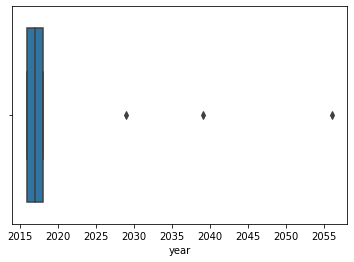

In [51]:
#Checking for outliers in the years
sns.boxplot(x=financial['year'])

This shows that there are years that are beyond or scope for analysis.
We are going to remove them later in the process in order to remain with the relevant years for analysis.

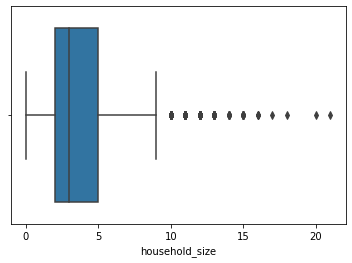

In [52]:
#Checking for outliers in the household sizes
sns.boxplot(x=financial['household_size'])

This shows that there are some households that are beyond the normal or rather the expected range. This is okay and it is just a variance in the range of household size.

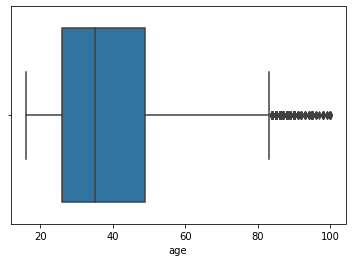

In [53]:
#Checking for outliers in the ages
sns.boxplot(x=financial['age'])

Thre seems to be some ages well beyond the range but this too is okay as the population or rather the concetration seems to be high. We are thus not going to remove these too.

In [54]:
#Checking for the sum of null values
financial.isnull().sum()

country                14
year                    0
id                      0
bank_account_access    36
location               15
cellphone_access       11
household_size         28
age                    34
gender                 34
rship_with_head         4
marital_status         32
education_level        29
job                    30
dtype: int64

In [55]:
#Checking for the number of unique items in the columns.
print(financial.nunique())

country                   4
year                      6
id                     8735
bank_account_access       2
location                  2
cellphone_access          2
household_size           21
age                      85
gender                    2
rship_with_head           6
marital_status            5
education_level           7
job                      10
dtype: int64


In [56]:
#Checking for types of education level.
print(financial['education_level'].unique())

['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6' nan]


In [57]:
#Checking  the types for relationship with the head of the household.
print(financial['rship_with_head'].unique())

['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]


In [58]:
#Checking te types for job.
print(financial['job'].unique())

['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' nan 'No Income']


In [199]:
#Checking te types for job.
print(financial['marital_status'].unique())

['married/living together' 'widowed' 'single/never married'
 'divorced/seperated' 'dont know']


## **Cleaning the Data**

In [59]:
#Removing the unique ID column
financial = financial.drop(columns=['id'])
financial.head()

,country,year,bank_account_access,location,cellphone_access,household_size,age,gender,rship_with_head,marital_status,education_level,job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [60]:
#Selecting the years that we need to remove the outliers.
financial = financial.query("2018 >=year >= 2016")
financial.shape

(23521, 12)

In [61]:
#Dropping rows with null values in the specified rows.
financial = financial.dropna(subset=['country','bank_account_access','location','cellphone_access','age','gender','marital_status','education_level','job'],how='any')
financial.shape

(23361, 12)

We can see that after dropping the values in the columns of interest the number of rows decreases.

In [62]:
#Checking if there are any null values in our rows of interest.
financial.isnull().sum()

country                 0
year                    0
bank_account_access     0
location                0
cellphone_access        0
household_size         21
age                     0
gender                  0
rship_with_head         0
marital_status          0
education_level         0
job                     0
dtype: int64

In [63]:
#Changing the values for the respective columns into lowercase values.
financial["country"] = financial["country"].str.lower()
financial["location"] = financial["location"].str.lower()
financial["bank_account_access"] = financial["bank_account_access"].str.lower()
financial["cellphone_access"] = financial["cellphone_access"].str.lower()
financial["gender"] = financial["gender"].str.lower()
financial["rship_with_head"] = financial["rship_with_head"].str.lower()
financial["marital_status"] = financial["marital_status"].str.lower()
financial["education_level"] = financial["education_level"].str.lower()
financial["job"] = financial["job"].str.lower()
financial.head()

,country,year,bank_account_access,location,cellphone_access,household_size,age,gender,rship_with_head,marital_status,education_level,job
0,kenya,2018,yes,rural,yes,3.0,24.0,female,spouse,married/living together,secondary education,self employed
1,kenya,2018,no,rural,no,5.0,70.0,female,head of household,widowed,no formal education,government dependent
2,kenya,2018,yes,urban,yes,5.0,26.0,male,other relative,single/never married,vocational/specialised training,self employed
3,kenya,2018,no,rural,yes,5.0,34.0,female,head of household,married/living together,primary education,formally employed private
4,kenya,2018,no,urban,no,8.0,26.0,male,child,single/never married,primary education,informally employed


#**Data Analysis**

## **Splitting the data**

In [64]:
#Dividing the data into financial years.
financial_2016 = financial.query("year == 2016")
financial_2017 = financial.query("year == 2017")
financial_2018 = financial.query("year == 2018")

In [65]:
#Dividing the data into the respective country financials.
financial_kenya = financial.loc[financial['country'] == 'kenya']
financial_rwanda = financial.loc[financial['country'] == 'rwanda']
financial_tanzania = financial.loc[financial['country'] == 'tanzania']
financial_uganda = financial.loc[financial['country'] == 'uganda']

## **Univariate Analysis**

***Distribution of Bank Account Access***

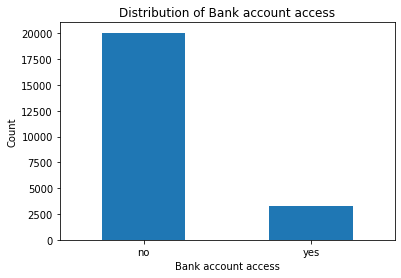

In [66]:
financial['bank_account_access'].value_counts().plot.bar(title='Distribution of Bank account access')
plt.xlabel('Bank account access')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

As seen above, the distribution shows that most of the people do not have access to bank accounts.

In [67]:
#Splitting the data into two groups of people with access to bank accounts and those without.
financial_yes_bank = financial.loc[financial['bank_account_access'] == 'yes']
financial_no_bank = financial.loc[financial['bank_account_access'] == 'no']

***Distribution of Cell Phone Access***

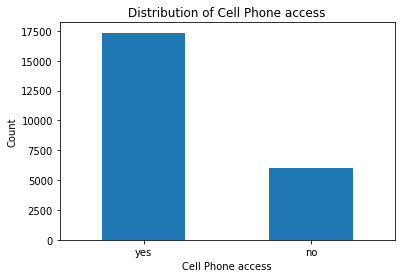

In [121]:
financial['cellphone_access'].value_counts().plot.bar(title='Distribution of Cell Phone access')
plt.xlabel('Cell Phone access')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

This shows that most people have access to cell phones.

## **Bivariate Analysis**

In [209]:
financial.isnull().sum()

country                 0
year                    0
bank_account_access     0
location                0
cellphone_access        0
household_size         21
age                     0
gender                  0
rship_with_head         0
marital_status          0
education_level         0
job                     0
dtype: int64

*Creating x axis for various fields.*

In [210]:
x= ['yes','no']
print(x)
x_cou = financial['country'].unique()
print(x_cou)
x_loc = financial['location'].unique()
print(x_loc)
x_edu = financial['education_level'].unique()
print(x_edu)
x_job = financial['job'].unique()
print(x_job)

['yes', 'no']
['kenya' 'rwanda' 'tanzania' 'uganda']
['rural' 'urban']
['secondary education' 'no formal education'
 'vocational/specialised training' 'primary education'
 'tertiary education' 'other/dont know/rta' '6']
['self employed' 'government dependent' 'formally employed private'
 'informally employed' 'formally employed government'
 'farming and fishing' 'remittance dependent' 'other income'
 'dont know/refuse to answer' 'no income']


No handles with labels found to put in legend.


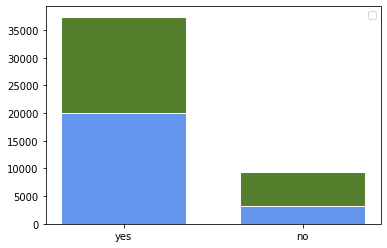

In [186]:
baa = financial['bank_account_access'].value_counts()
ca = financial['cellphone_access'].value_counts()
barWidth = 0.7
plt.bar(x, baa, color='cornflowerblue', edgecolor='white', width=barWidth)
plt.bar(x, ca, bottom=baa, color='#557f2d', edgecolor='white', width=barWidth)
plt.legend()
plt.show()

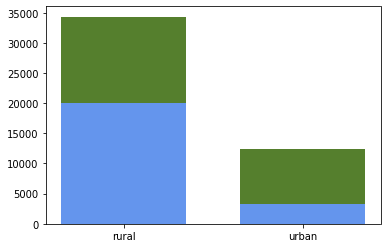

In [198]:
loca = financial['location'].value_counts()
barWidth = 0.7
plt.bar(x_loc, baa, color='cornflowerblue', width=barWidth)
plt.bar(x_loc, loca, bottom=baa, color='#557f2d', width=barWidth)
plt.show()

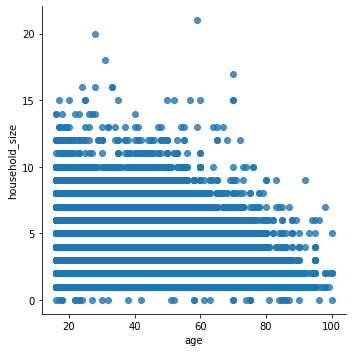

In [207]:
sns.lmplot( x="age", y="household_size", data=financial, fit_reg=False, legend=False)
plt.show()

We can see here that there is a type of relation between the age and the household size.

## **Multivariate Analysis**

# **Conclusion**

# **Recommendation**